In [7]:
"""
Analyse Exploratoire des Données - Importation des Modules
Dataset d'Etats Quantiques 
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / 'src'))

from data_generation import create_dataset, print_dataset_info

print('Modules importes avec succès.')

Modules importes avec succès.


In [9]:
# Creation du dataset
print('Creation du dataset...')
df = create_dataset(
    n_valid=5000,
    n_invalid=5000,
    dim=4,
    valid_strategy='random',
    invalid_strategy='mixed',
    invalid_kwargs={'extreme_prob': 0.10, 'scale_range': (0.1, 2.5)},
    seed=42,
    shuffle=True
)

print('Dataset créé avec succès.')
print_dataset_info(df)

Creation du dataset...
Génération de 5000 états valides (stratégie: random)...
Génération de 5000 états invalides (stratégie: mixed)...
Construction du DataFrame...
Mélange du dataset...

DATASET CRÉÉ
Shape: (10000, 11)
Dimension: 4
États valides: 5000 (50.0%)
États invalides: 5000 (50.0%)

 Distribution de is_valid:
is_valid
0    5000
1    5000
Name: count, dtype: int64

 Statistiques de norm_squared:
count    10000.000000
mean       209.149080
std       1499.270585
min          0.000119
25%          1.000000
50%          1.000000
75%          2.248055
max      18694.725592
Name: norm_squared, dtype: float64
Dataset créé avec succès.
INFORMATIONS SUR LE DATASET

 Taille:
   Échantillons: 10000
   Features: 9
   Dimension: 4

 Distribution des classes:
   Valides (1): 5000 (50.0%)
   Invalides (0): 5000 (50.0%)
   Ratio: 1.000
    Dataset bien équilibré

 Statistiques de norm_squared:
   count   : 10000.000000
   mean    : 209.149080
   std     : 1499.270585
   min     : 0.000119
   25

In [10]:
#Vue d'ensemble du dataset
print('Premieres lignes:')
display(df.head(10))

print('Informations generales:')
print(df.info())

print('Statistiques descriptives:')
display(df.describe())

Premieres lignes:


,state_id,c0_real,c0_imag,c1_real,c1_imag,c2_real,c2_imag,c3_real,c3_imag,norm_squared,is_valid
0,0,-0.053622,-0.123344,80.483889,62.545542,-0.164819,0.099997,-0.042544,0.013492,10389.658556,0
1,1,0.367674,0.131027,-0.496635,-0.270775,0.544840,-0.357057,-0.319497,-0.035539,1.000000,1
2,2,0.770756,-0.287937,-0.252693,-0.087839,-0.470096,-0.047689,0.166820,-0.019116,1.000000,1
3,3,-0.199763,-0.803579,0.078989,-0.039769,-0.351860,0.284865,0.235394,0.214874,1.000000,1
4,4,0.112146,-0.173427,-0.321375,0.137120,-0.180075,0.570432,-0.278259,-0.632467,1.000000,1
5,5,95.360337,57.457408,0.037101,0.129057,0.047803,0.182104,0.091362,0.015313,12395.009593,0
6,6,0.439417,-0.427328,-0.316049,-0.491276,0.217866,0.268608,0.345572,0.209829,1.000000,1
7,7,-0.283676,0.185952,-1.237850,0.840819,-0.360479,0.310935,-1.141493,-1.358748,5.730129,0
8,8,0.559180,0.792486,-0.286920,0.203336,-0.514193,0.033120,0.081912,-0.728144,1.866781,0
9,9,0.398047,-0.301359,0.669029,-0.179592,0.373694,-0.021505,0.044518,-0.358882,1.000000,1


Informations generales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      10000 non-null  int64  
 1   c0_real       10000 non-null  float64
 2   c0_imag       10000 non-null  float64
 3   c1_real       10000 non-null  float64
 4   c1_imag       10000 non-null  float64
 5   c2_real       10000 non-null  float64
 6   c2_imag       10000 non-null  float64
 7   c3_real       10000 non-null  float64
 8   c3_imag       10000 non-null  float64
 9   norm_squared  10000 non-null  float64
 10  is_valid      10000 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 859.5 KB
None
Statistiques descriptives:


,state_id,c0_real,c0_imag,c1_real,c1_imag,c2_real,c2_imag,c3_real,c3_imag,norm_squared,is_valid
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.522297,0.512272,0.430858,0.404005,0.559060,0.582734,0.497416,0.475568,209.149080,0.500000
std,2886.89568,5.096127,5.304566,4.583557,4.273678,5.500132,5.845038,4.958031,4.977928,1499.270585,0.500025
min,0.00000,-6.378995,-8.145039,-7.729238,-7.602548,-7.367624,-9.021905,-7.238562,-6.805565,0.000119,0.000000
25%,2499.75000,-0.278668,-0.272926,-0.283732,-0.273074,-0.274436,-0.279325,-0.277703,-0.275003,1.000000,0.000000
50%,4999.50000,0.009072,0.008340,0.007619,0.006841,0.011691,0.009544,0.012801,0.007757,1.000000,0.500000
75%,7499.25000,0.328425,0.311339,0.310561,0.308869,0.327752,0.319327,0.326674,0.323400,2.248055,1.000000
max,9999.00000,97.652377,99.596682,96.841702,92.565068,99.060591,99.505431,98.588046,98.542506,18694.725592,1.000000


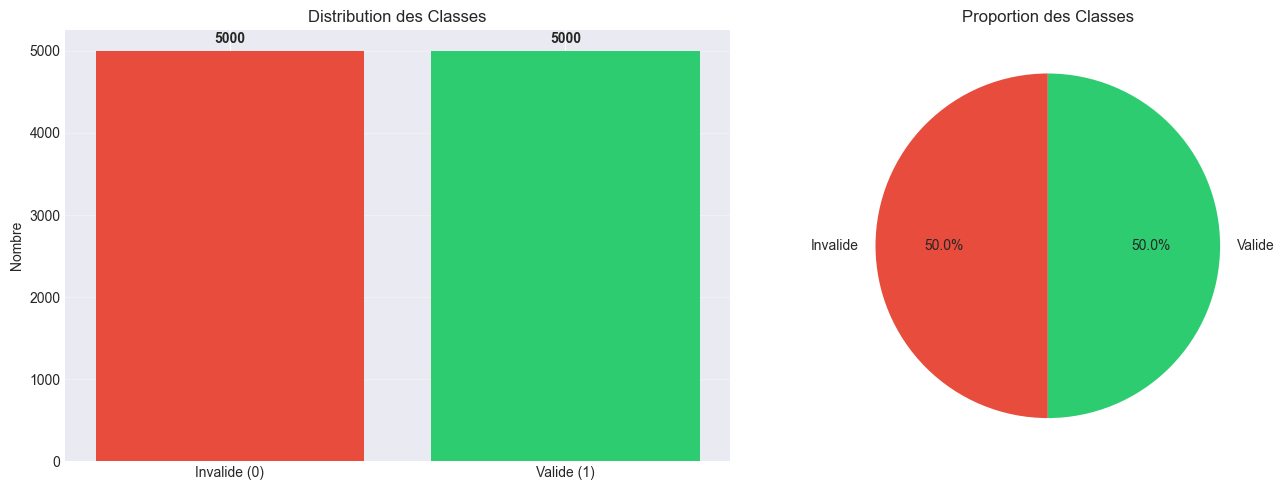

Dataset equilibre: 1.00 ratio


In [12]:
# Distribution de la variable cible

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

counts = df['is_valid'].value_counts()
axes[0].bar(['Invalide (0)', 'Valide (1)'], counts.values, color=['#e74c3c', '#2ecc71'])
axes[0].set_ylabel('Nombre')
axes[0].set_title('Distribution des Classes')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

axes[1].pie(counts.values, labels=['Invalide', 'Valide'], autopct='%1.1f%%',
            colors=['#e74c3c', '#2ecc71'], startangle=90)
axes[1].set_title('Proportion des Classes')

plt.tight_layout()
plt.show()

print(f'Dataset equilibre: {counts[1]/counts[0]:.2f} ratio')

#Calcule et affiche le ratio d'équilibrage (états valides / états invalides) avec 2 décimales.

In [ ]:
#Analyse de la norme au carré des états quantiques

df_valid = df[df['is_valid'] == 1]
df_invalid = df[df['is_valid'] == 0]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram de toutes les données
axes[0, 0].hist(df['norm_squared'], bins=100, alpha=0.7, color='steelblue', edgecolor='none')
axes[0, 0].axvline(1, color='red', linestyle='--', linewidth=2, label='Norme = 1')
axes[0, 0].set_xlabel('Norme au carré', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].set_title('Distribution de norm_squared (toutes classes)', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(alpha=0.3)

# Focus sur les valeurs proches de 1 (zone d'intérêt)
valid_filtered = df_valid[df_valid['norm_squared'] <= 10]
invalid_filtered = df_invalid[df_invalid['norm_squared'] <= 10]

axes[0, 1].hist(valid_filtered['norm_squared'], bins=50, alpha=0.7,
                label=f'Valide (n={len(valid_filtered)})', color='#2ecc71', edgecolor='none')
axes[0, 1].hist(invalid_filtered['norm_squared'], bins=50, alpha=0.7,
                label=f'Invalide (n={len(invalid_filtered)})', color='#e74c3c', edgecolor='none')
axes[0, 1].axvline(1, color='red', linestyle='--', linewidth=2, label='Norme théorique = 1')
axes[0, 1].set_xlabel('Norme au carré', fontsize=11)
axes[0, 1].set_ylabel('Fréquence', fontsize=11)
axes[0, 1].set_title('Distribution par classe (norm² ≤ 10)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlim(0, 10)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Boxplot
df.boxplot(column='norm_squared', by='is_valid', ax=axes[1, 0], 
           patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1, 0].set_xlabel('Classe (0=Invalide, 1=Valide)', fontsize=11)
axes[1, 0].set_ylabel('Norme au carré', fontsize=11)
axes[1, 0].set_title('Boxplot par classe', fontsize=12, fontweight='bold')
axes[1, 0].axhline(1, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Norme = 1')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(alpha=0.3)
plt.suptitle('')

# Violin plot
parts = axes[1, 1].violinplot([df_valid['norm_squared'], df_invalid['norm_squared']], 
                               positions=[0, 1], showmeans=True, showmedians=True, widths=0.7)
for pc in parts['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_alpha(0.7)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Valide', 'Invalide'], fontsize=11)
axes[1, 1].set_ylabel('Norme au carré', fontsize=11)
axes[1, 1].set_title('Violin Plot par classe', fontsize=12, fontweight='bold')
axes[1, 1].axhline(1, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Norme = 1')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print('Statistiques de norm_squared:')
print('\n' + '='*60)
print('ÉTATS VALIDES:')
print('='*60)
print(df_valid['norm_squared'].describe())
print('\n' + '='*60)
print('ÉTATS INVALIDES:')
print('='*60)
print(df_invalid['norm_squared'].describe())